# 三角划分trap的STL文件，使得势场性质收敛

原始STL文件三角形个数较少，通过格林函数传播子计算空间势场精度不够。需要通过将三角形细化得到精确的空间势场分布

### 细化方法
采用了meshLab的Remeshing: Isotropic Explicit Remeshing方法。

### 判断标准
每一次remeshing都会让三角形个数增多，基于新获得的细化网格，计算原点的rf零点高度，直到rf零点高度不会再因为网格细化而变化。此时我们认为势场已经收敛，即再增加网格密度失去意义。

### 结果
结果发现，5次细化后的网格文件对应的势场参数已经接近收敛。后续将以`bowtie_ie5.stl`文件为基准计算势场

In [1]:
from potential_initialization import *
from trap_model import *
%load_ext autoreload
%autoreload 2
# 缓存pseudo potential在一个字典中，若在调试时修改了trap_model的定义可以快速初始化
pbi= dict()

In [2]:
'''
原始网格
'''
# 设置需要计算势场的区域
shuttle_range = [[-0.02, 0.03], [-0.1, 0.1], [0.08, 0.2]]
stepsize = 0.01
# rf电压和频率需要提前设置
V_rf = 160
omega_rf = 2 * np.pi * 16e6
# 初始化trap_model类型
bowtie = trap_model("bowtie", V_rf, omega_rf, shuttle_range, stepsize, pbi, regenerate=True)

Calculating charge basis


  0%|          | 0/130 [00:00<?, ?it/s]

Calculating propagators with #40 as rf


  0%|          | 0/130 [00:00<?, ?it/s]

  0%|          | 0/47 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

In [12]:
'''
细化1次的表格
'''

# 设置需要计算势场的区域
pbi= dict()
shuttle_range = [[-0.02, 0.03], [-0.1, 0.1], [0.08, 0.2]]
stepsize = 0.01
# rf电压和频率需要提前设置
V_rf = 160
omega_rf = 2 * np.pi * 16e6
# 初始化trap_model类型
bowtie1 = trap_model("bowtie_ie1", V_rf, omega_rf, shuttle_range, stepsize, pbi, regenerate=True)

Calculating charge basis


  0%|          | 0/436 [00:00<?, ?it/s]

Calculating propagators with #40 as rf


  0%|          | 0/436 [00:00<?, ?it/s]

  0%|          | 0/47 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

In [37]:
'''
细化2次的表格
'''
# 设置需要计算势场的区域
pbi= dict()
shuttle_range = [[-0.02, 0.03], [-0.1, 0.1], [0.08, 0.2]]
stepsize = 0.01
# rf电压和频率需要提前设置
V_rf = 160
omega_rf = 2 * np.pi * 16e6
# 初始化trap_model类型
bowtie2 = trap_model("bowtie_ie2", V_rf, omega_rf, shuttle_range, stepsize, pbi, regenerate=True, rf_id=12)

Calculating charge basis


  0%|          | 0/1204 [00:00<?, ?it/s]

Calculating propagators with #12 as rf


  0%|          | 0/1204 [00:00<?, ?it/s]

  0%|          | 0/47 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

In [40]:
'''
细化3次的表格
'''
# 设置需要计算势场的区域
pbi= dict()
shuttle_range = [[-0.02, 0.03], [-0.1, 0.1], [0.08, 0.2]]
stepsize = 0.01
# rf电压和频率需要提前设置
V_rf = 160
omega_rf = 2 * np.pi * 16e6
# 初始化trap_model类型
bowtie3 = trap_model("bowtie_ie3", V_rf, omega_rf, shuttle_range, stepsize, pbi, regenerate=True, rf_id=12)

Calculating charge basis


  0%|          | 0/2557 [00:00<?, ?it/s]

Calculating propagators with #12 as rf


  0%|          | 0/2557 [00:00<?, ?it/s]

  0%|          | 0/47 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

In [43]:
# 设置需要计算势场的区域
pbi= dict()
shuttle_range = [[-0.02, 0.03], [-0.1, 0.1], [0.08, 0.2]]
stepsize = 0.01
# rf电压和频率需要提前设置
V_rf = 160
omega_rf = 2 * np.pi * 16e6
# 初始化trap_model类型
bowtie4 = trap_model("bowtie_ie4", V_rf, omega_rf, shuttle_range, stepsize, pbi, regenerate=True, rf_id=12)

Calculating charge basis


  0%|          | 0/3655 [00:00<?, ?it/s]

Calculating propagators with #12 as rf


  0%|          | 0/3655 [00:00<?, ?it/s]

  0%|          | 0/47 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

In [4]:
# 设置需要计算势场的区域
pbi= dict()
shuttle_range = [[-0.02, 0.03], [-0.1, 0.1], [0.08, 0.2]]
stepsize = 0.01
# rf电压和频率需要提前设置
V_rf = 160
omega_rf = 2 * np.pi * 16e6
# 初始化trap_model类型
bowtie5 = trap_model("bowtie_ie5", V_rf, omega_rf, shuttle_range, stepsize, pbi, regenerate=False, rf_id=12)

  0%|          | 0/47 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

0.08526986347132393
0.08628770822879686
0.08453135479036146
0.08229177757676204
0.08251269651129195
0.08211998203699962


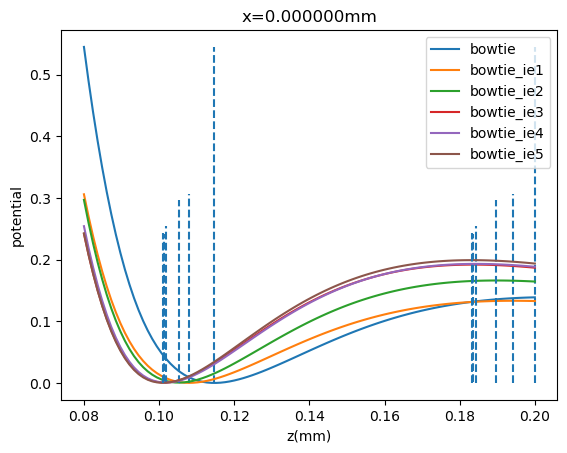

In [49]:
bowtie.reset_rf(V_rf=160, omega_rf=16e6*2*np.pi)
print(bowtie.depth_of_trap(0, ploting=True))
print(bowtie1.depth_of_trap(0, ploting=True))
print(bowtie2.depth_of_trap(0, ploting=True))
print(bowtie3.depth_of_trap(0, ploting=True))
print(bowtie4.depth_of_trap(0, ploting=True))
print(bowtie5.depth_of_trap(0, ploting=True))

In [23]:
bowtie.plot(40)